### Problem 1: Generating Some Data As A Toy Example



Generate three clusters of data as A, B, and C. 

* A = 10 (x,y) samples from the gaussian distribution, with mean=(0,0), cov=I, i.
e., N(mean,std)

* B = 10 (x,y) samples from the gaussian distribution, with mean=(4,4), cov=I, i.e., N(mean,std)

* C = 10 (x,y) samples from the gaussian distribution, with mean=(-4,4), cov=I, i.e., N(mean,std)

*Hint: use the multivariate_normal function, and set the mean, covariance, and size for each cluster.*

In [93]:
import numpy as np
# Add code here to generate the three clusters
A = np.random.multivariate_normal(mean = [0,0], cov = np.eye(2), size = 10)
B = np.random.multivariate_normal(mean = [4,4], cov = np.eye(2), size = 10)
C = np.random.multivariate_normal(mean = [-4, 4], cov = np.eye(2), size = 10)

data = [A, B, C]
print(data)

[array([[-0.50887904, -0.88129611],
       [ 1.13904325,  0.6874677 ],
       [ 0.03202481, -0.6323101 ],
       [-0.54739417, -1.61290447],
       [-1.46116217,  0.54069575],
       [ 0.54114816,  0.02239964],
       [-0.39339198, -0.30328351],
       [ 1.52272624,  1.82094161],
       [ 0.46685346, -0.4799988 ],
       [ 0.2443838 , -1.11895365]]), array([[4.67936864, 4.50971894],
       [4.6924012 , 3.24210102],
       [3.4407727 , 3.15074913],
       [3.95379114, 3.81440303],
       [3.49334418, 3.04178039],
       [2.49183476, 3.89577175],
       [2.70122595, 2.700334  ],
       [4.93054695, 3.82405058],
       [1.80608744, 4.39480949],
       [3.0369911 , 4.27348508]]), array([[-2.94158905,  3.97416186],
       [-2.80493789,  4.69197054],
       [-4.65516161,  5.70426465],
       [-4.32846808,  4.26597987],
       [-2.19240706,  3.98279836],
       [-5.98296107,  2.07670436],
       [-5.37538955,  4.78903668],
       [-2.90091756,  3.35449216],
       [-3.8502257 ,  2.88206129],


Visualize the true distribution of the samples by plotting them in a scatter plot. Plot the x and y coordinates for each sample in A, B, and C. Try to use a for loop to do this. 

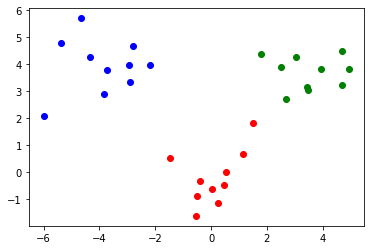

In [94]:
import matplotlib.pyplot as plt
color_list = ['r','g','b']

# Add your code here
for i in range(3):
  plt.scatter(data[i][:,0], data[i][:, 1], c = color_list[i])



### Problem 2: How can we cluster these points if we do not know the labels?

First, mix and shuffle the data, which includes A, B, and C. There's a function in the numpy library that will do this. 

Then, visualize the data through a scatter plot. 

[[-0.50887904 -0.88129611]
 [ 1.13904325  0.6874677 ]
 [ 0.03202481 -0.6323101 ]
 [-0.54739417 -1.61290447]
 [-1.46116217  0.54069575]
 [ 0.54114816  0.02239964]
 [-0.39339198 -0.30328351]
 [ 1.52272624  1.82094161]
 [ 0.46685346 -0.4799988 ]
 [ 0.2443838  -1.11895365]
 [ 4.67936864  4.50971894]
 [ 4.6924012   3.24210102]
 [ 3.4407727   3.15074913]
 [ 3.95379114  3.81440303]
 [ 3.49334418  3.04178039]
 [ 2.49183476  3.89577175]
 [ 2.70122595  2.700334  ]
 [ 4.93054695  3.82405058]
 [ 1.80608744  4.39480949]
 [ 3.0369911   4.27348508]
 [-2.94158905  3.97416186]
 [-2.80493789  4.69197054]
 [-4.65516161  5.70426465]
 [-4.32846808  4.26597987]
 [-2.19240706  3.98279836]
 [-5.98296107  2.07670436]
 [-5.37538955  4.78903668]
 [-2.90091756  3.35449216]
 [-3.8502257   2.88206129]
 [-3.73521729  3.79147557]]


[[ 1.80608744  4.39480949]
 [ 4.93054695  3.82405058]
 [ 0.46685346 -0.4799988 ]
 [-0.54739417 -1.61290447]
 [-2.19240706  3.98279836]
 [ 4.6924012   3.24210102]
 [ 1.13904325  0.6874677 

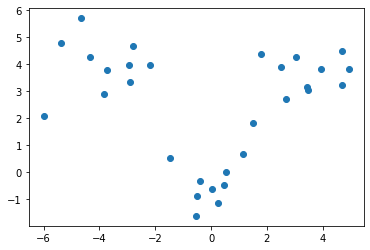

In [95]:
# Add your code here to mix and shuffle the data. Make sure data contains A, B, and C.
data = np.concatenate([A, B, C])
print(data)

np.random.shuffle(data)
print(f'\n\n{data}')


# Add your code to visualize the samples through a scatter plot
plt.scatter(data[:, 0], data[:, 1])


Now, implement the K-Means algorithm yourself. 


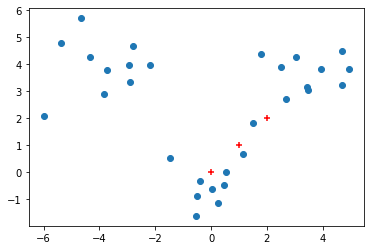

In [96]:
# How many clusters should you have? Set the value of K based on the number of clusters you created in Problem 1.
# from sklearn.cluster import KMeans
# K = KMeans(n_clusters = 3, random_state = 0, n_iter = 'auto').fit()
K = 3
# Select three random points as initial centers (pick any three coordinates)
centers = np.array([[0, 0], [1, 1], [2 , 2]])

# Now visualize the center and the samples. You can add a 'marker' parameter in the numpy scatterplot function to visualize where the center is. 

plt.figure()
plt.scatter(data[:, 0], data[:, 1])
plt.scatter(centers[0][0],centers[0][1],c='r', marker='+')
plt.scatter(centers[1][0],centers[1][1],c='r', marker='+')
plt.scatter(centers[2][0],centers[2][1],c='r', marker='+')

In [97]:
# Create a new empty array of zeros to store the distances in 
dist = np.zeros([len(data),3])


# Iterate through the clusters and fill the distance array 
for d_id, d in enumerate(data):
  for c_id, c in enumerate(centers):
    
    dist[d_id, c_id] = np.sqrt(np.sum((d - c)**2))

print(dist)
# Calculate the distance between the sample to each class center. You can do this using the norm function.




[[4.75145266 3.48919883 2.40264741]
 [6.23968397 4.83988233 3.45184964]
 [0.66959017 1.57309939 2.91563585]
 [1.70326193 3.03672496 4.4206669 ]
 [4.54635365 4.36904439 4.63764663]
 [5.70349437 4.31981986 2.96510357]
 [1.33042525 0.34206646 1.56970939]
 [4.80941942 5.20258051 5.91634793]
 [4.43485517 4.55640112 5.08464768]
 [0.54161155 1.07992939 2.45746859]
 [4.63204938 3.22267472 1.82081938]
 [5.24270823 3.85552036 2.4988167 ]
 [5.46646724 5.30171659 5.50764319]
 [5.32232423 5.49678257 6.00850248]
 [0.63312056 1.89773872 3.28663701]
 [4.62453003 3.25746297 1.95853312]
 [1.55799448 2.50365326 3.75622317]
 [3.81947972 2.40526619 0.99105274]
 [7.36268733 7.35601514 7.61661031]
 [4.94438153 4.93778929 5.32133606]
 [1.01766435 2.41163659 3.82051585]
 [7.19928365 7.41635968 7.88511868]
 [0.49672743 1.90790176 3.32166225]
 [6.07735306 6.24973572 6.72191736]
 [5.49382697 4.07991991 2.66633797]
 [1.14532996 2.24964895 3.57911443]
 [6.3331291  7.06548212 7.98332957]
 [2.37371514 0.97323576 0.50

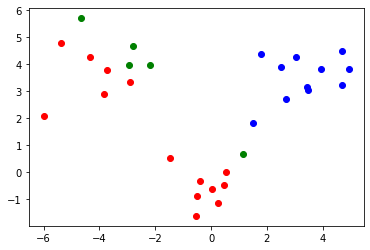

In [98]:
# Assign the class of each sample to the closest center. You can use the numpy function argmin, which returns the indices of the minimum values along an axis.
labels = np.argmin(dist, axis=1)

# Visualize the initial cluster results for the three clusters: 
for i in range(K):
  plt.scatter(data[labels == i][:,0], data[labels == i][:, 1], c = color_list[i])


[array([-0.05415266, -0.41979817]), array([-3.87672749,  3.95129453]), array([3.34082639, 3.51528591])]


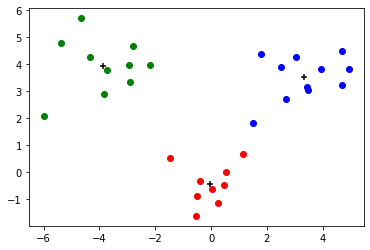

In [101]:
# Find new centers and assign new labels to the samples, then visualize again
centers = [] 
for i in range(K):
  center = np.mean(data[labels == i], axis=0)
  centers.append(center)
print(centers)

# Calculate the new distance the way you did before
dist = np.zeros([len(data), 3])
for d_id, d in enumerate(data):
  for c_id, c in enumerate(centers):
    dist[d_id,c_id] = np.sqrt(np.sum((d - c)**2))


# Assign new labels like you did before using argmin
labels = np.argmin(dist, axis=1)

# Visualize the data again 
plt.figure()
for i in range(K):
  plt.scatter(data[labels == i][:,0], data[labels == i][:, 1], c = color_list[i])

# Plot the centers as a scatter plot

plt.scatter(centers[0][0],centers[0][1],c='black', marker='+')
plt.scatter(centers[1][0],centers[1][1],c='black', marker='+')
plt.scatter(centers[2][0],centers[2][1],c='black', marker='+')

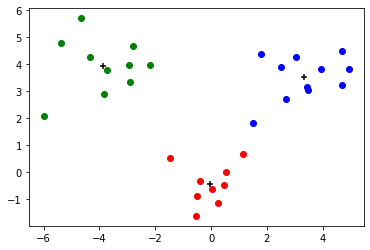

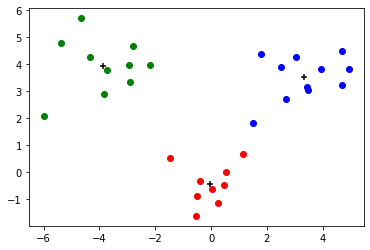

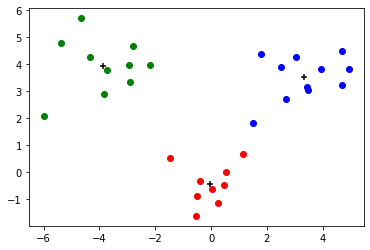

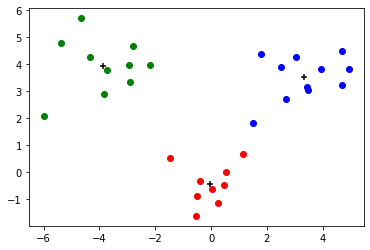

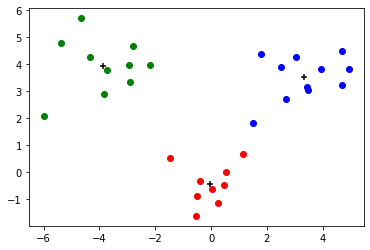

In [102]:
# Iterate finding new centers and assigning new labels 5 times. Hint: you have all the code for one time above. 
for iter in range(5):
  # Find new centers
  centers = [] 

  for i in range(K):
    center = np.mean(data[labels == i], axis=0)
    centers.append(center)

  # Calculate the new distance
  dist = np.zeros([len(data), 3])

  for d_id, d in enumerate(data):
    for c_id, c in enumerate(centers):
      dist[d_id,c_id] = np.sqrt(np.sum((d - c)**2))

  # Assign new labels
  labels = np.argmin(dist, axis=1)

  # Visualize in 5 figures respectively to see the convergence
  plt.figure()
  for i in range(K):
    plt.scatter(data[labels == i][:,0], data[labels == i][:, 1], c = color_list[i])

  plt.scatter(centers[0][0],centers[0][1],c='black', marker='+')
  plt.scatter(centers[1][0],centers[1][1],c='black', marker='+')
  plt.scatter(centers[2][0],centers[2][1],c='black', marker='+')  
